# CNN Results Exploration

## Training History

### Import 

In [48]:
import pandas as pd

# Load the CSV file 
file_path_EN = "../models/CNN_EfficientNet/checkpoints/training_history.csv"  
df_Efficient_Training = pd.read_csv(file_path_EN)

file_path_VGG = "../models/CNN_VGG/checkpoints/training_history.csv"  
df_VGG_Training = pd.read_csv(file_path_VGG)

file_path_RN = "../models/CNN_ResNet/checkpoints/training_history.csv"  
df_ResNet_Training = pd.read_csv(file_path_RN)

file_path_B = "../models/cnn_ryan/checkpoints/training_history.csv"  
df_bespoke_Training = pd.read_csv(file_path_B)


#### Exploration

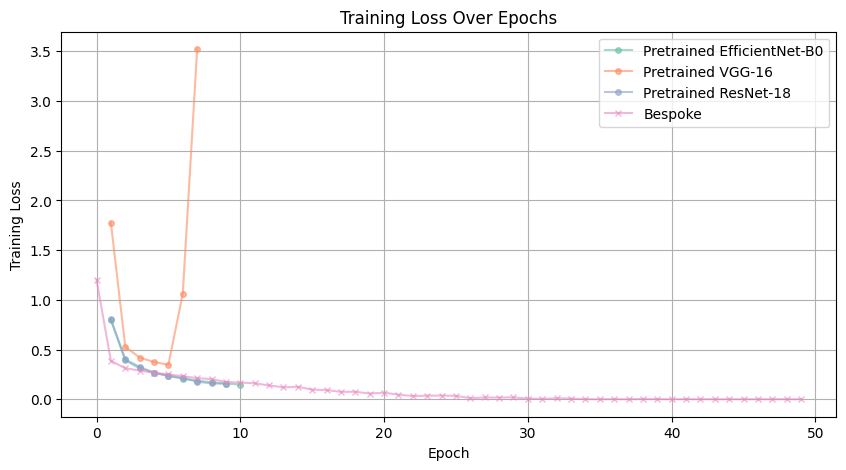

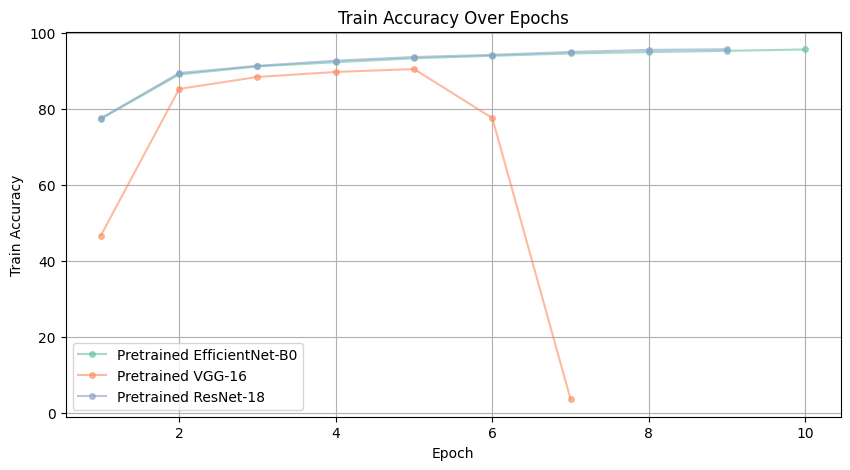

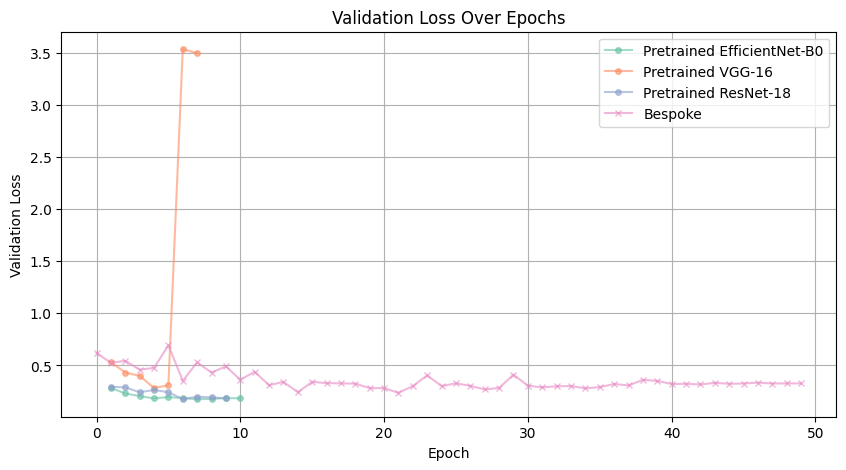

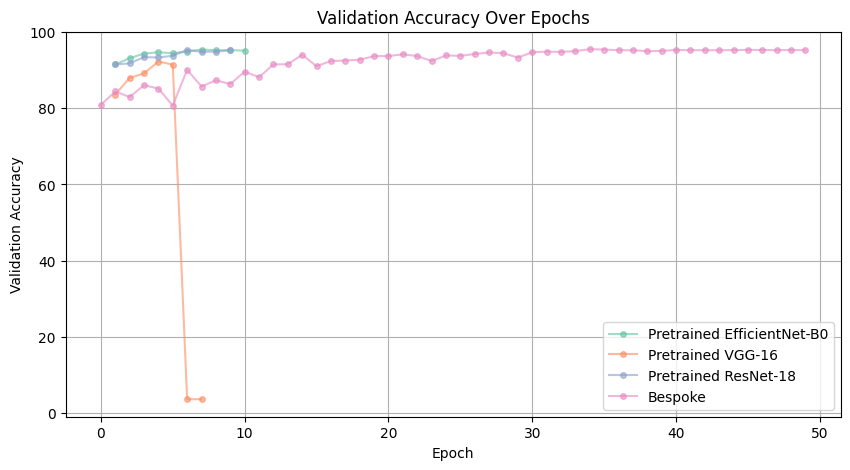

In [49]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns_colors = sns.color_palette("Set2", 5)
#colors = plt.get_cmap("viridis")(np.linspace(0, 1, 2)) 

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Loss"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Loss"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Loss"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Accuracy"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Accuracy"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Accuracy"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], label="Bespoke", marker="o", markersize=2, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Loss"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Loss"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Loss"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Loss"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Accuracy"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Accuracy"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Accuracy"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Accuracy"], label="Bespoke", marker="o", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()


## Test Results

#### Import

In [15]:
# Define file path
EF_RESULTS_PATH = "../models/CNN_EfficientNet/results/test_results.txt"
EF_CONF_MATRIX_PATH = "../models/CNN_EfficientNet/results/confusion_matrix.png"

VGG_RESULTS_PATH = "../models/CNN_VGG/results/test_results.txt"
VGG_CONF_MATRIX_PATH = "../models/CNN_VGG/results/confusion_matrix.png"

RN_RESULTS_PATH = "../models/CNN_ResNet/results/test_results.txt"
RN_CONF_MATRIX_PATH = "../models/CNN_ResNet/results/confusion_matrix.png"

In [16]:
import pandas as pd
import re
import os

# Parse test results txt file 
# Returns a DataFrame containing class-wise precision, recall, f1-score, and support.
def parse_classification_report(results_path):

    # Check if file exists
    if not os.path.exists(results_path):
        print(f"Error: File not found at {results_path}")
        return None

    # Read the test results file
    with open(results_path, "r") as f:
        test_results = f.readlines()  # Read as a list of lines

    # Find where the classification report starts
    try:
        start_idx = next(i for i, line in enumerate(test_results) if "Classification Report:" in line) + 2
        end_idx = next(i for i, line in enumerate(test_results) if "Confusion Matrix" in line)
    except StopIteration:
        print(f"Error: Could not find classification report in {results_path}")
        return None

    # Extract classification report lines
    report_lines = test_results[start_idx:end_idx]

    # Clean up empty lines and strip whitespace
    report_lines = [line.strip() for line in report_lines if line.strip()]

    # Define expected columns
    columns = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    report_data = []

    # Process each line carefully
    for line in report_lines:
        parts = re.split(r'\s+', line.strip())

        # Handle special cases like "accuracy" that have fewer columns
        if len(parts) == 2:
            parts.insert(1, '')  # Add empty placeholders for missing columns
            parts.insert(2, '')
            parts.insert(3, '')

        # Ensure all rows have 5 columns
        if len(parts) == 5:
            report_data.append(parts)
        else:
            print(f"Skipping malformed row: {parts}")  # Debugging help

    # Convert into DataFrame
    df_report = pd.DataFrame(report_data, columns=columns)
    df_report.set_index("Class", inplace=True)  # Set class names as index

    # Convert numerical columns to float (except "Support", which is integer)
    for col in ["Precision", "Recall", "F1-Score"]:
        df_report[col] = pd.to_numeric(df_report[col], errors="coerce")

    df_report["Support"] = pd.to_numeric(df_report["Support"], errors="coerce", downcast="integer")

    return df_report


In [50]:
test_results_EF = parse_classification_report(EF_RESULTS_PATH)
test_results_VGG = parse_classification_report(VGG_RESULTS_PATH)
test_results_RN = parse_classification_report(RN_RESULTS_PATH)

# fix index issue
test_results_EF = test_results_EF.reset_index().rename(columns={"index": "Class"})
test_results_VGG = test_results_VGG.reset_index().rename(columns={"index": "Class"})
test_results_RN = test_results_RN.reset_index().rename(columns={"index": "Class"})

Skipping malformed row: ['accuracy', '0.95', '11005']
Skipping malformed row: ['macro', 'avg', '0.94', '0.94', '0.94', '11005']
Skipping malformed row: ['weighted', 'avg', '0.95', '0.95', '0.95', '11005']
Skipping malformed row: ['accuracy', '0.91', '11005']
Skipping malformed row: ['macro', 'avg', '0.91', '0.90', '0.91', '11005']
Skipping malformed row: ['weighted', 'avg', '0.92', '0.91', '0.91', '11005']
Skipping malformed row: ['accuracy', '0.95', '11005']
Skipping malformed row: ['macro', 'avg', '0.95', '0.94', '0.94', '11005']
Skipping malformed row: ['weighted', 'avg', '0.95', '0.95', '0.95', '11005']


#### Exploration 

In [60]:
test_results_EF = test_results_EF.reset_index().rename(columns={"index": "Class"})
test_results_VGG = test_results_VGG.reset_index().rename(columns={"index": "Class"})
test_results_RN = test_results_RN.reset_index().rename(columns={"index": "Class"})
print(test_results_EF.index)
print(test_results_VGG.index)
print(test_results_RN.index)

RangeIndex(start=0, stop=35, step=1)
RangeIndex(start=0, stop=35, step=1)
RangeIndex(start=0, stop=35, step=1)


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine all models into one DataFrame for easier visualization
test_results_EF["Model"] = "EfficientNet"
test_results_VGG["Model"] = "VGG16"
test_results_RN["Model"] = "ResNet18"

df_all_models = pd.concat([test_results_EF, test_results_VGG, test_results_RN], ignore_index=True)
df_melted = df_all_models.melt(id_vars=["Class", "Model"], value_vars=["Precision", "Recall", "F1-Score"])

Bar Chart Comparison 

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_12486/3221637113.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "F1-Score"], ci=None)


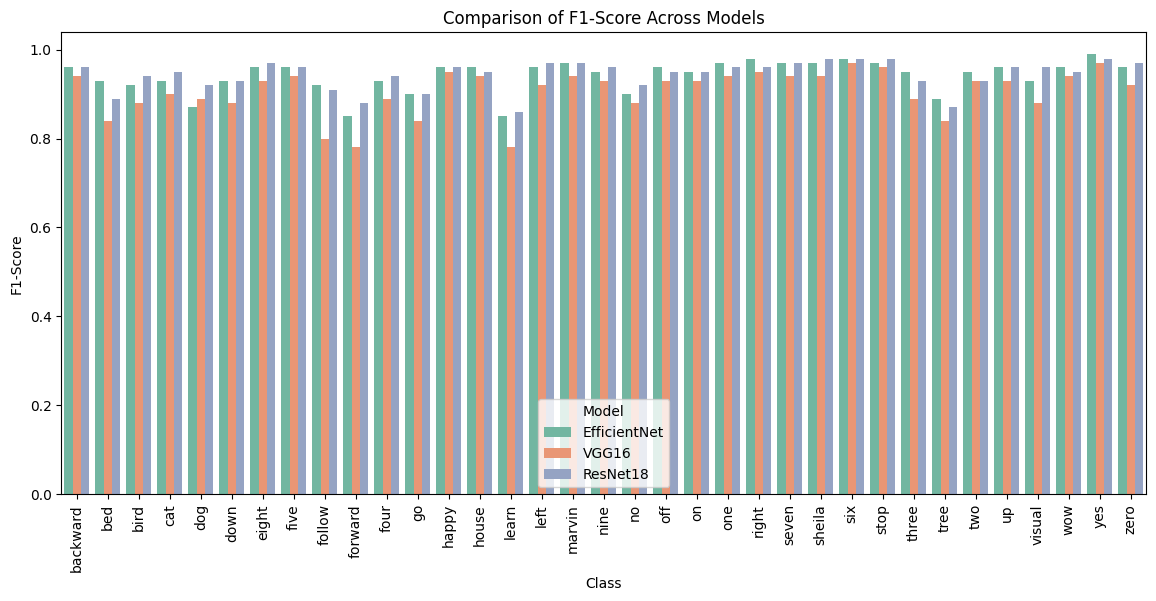

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_12486/3221637113.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Precision"], ci=None)


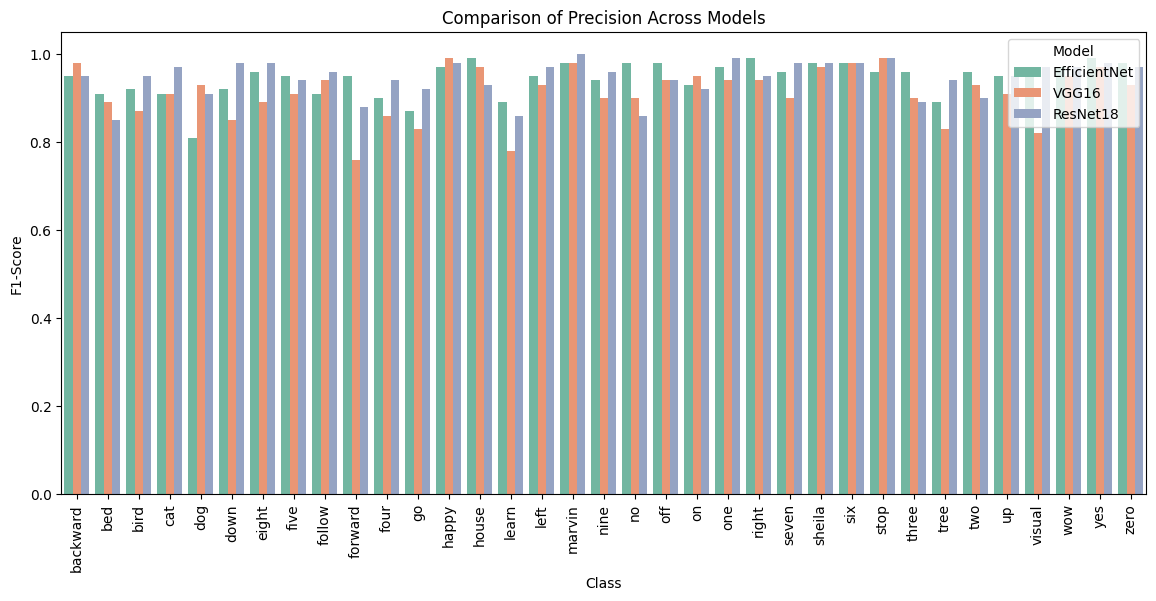

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_12486/3221637113.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Recall"], ci=None)


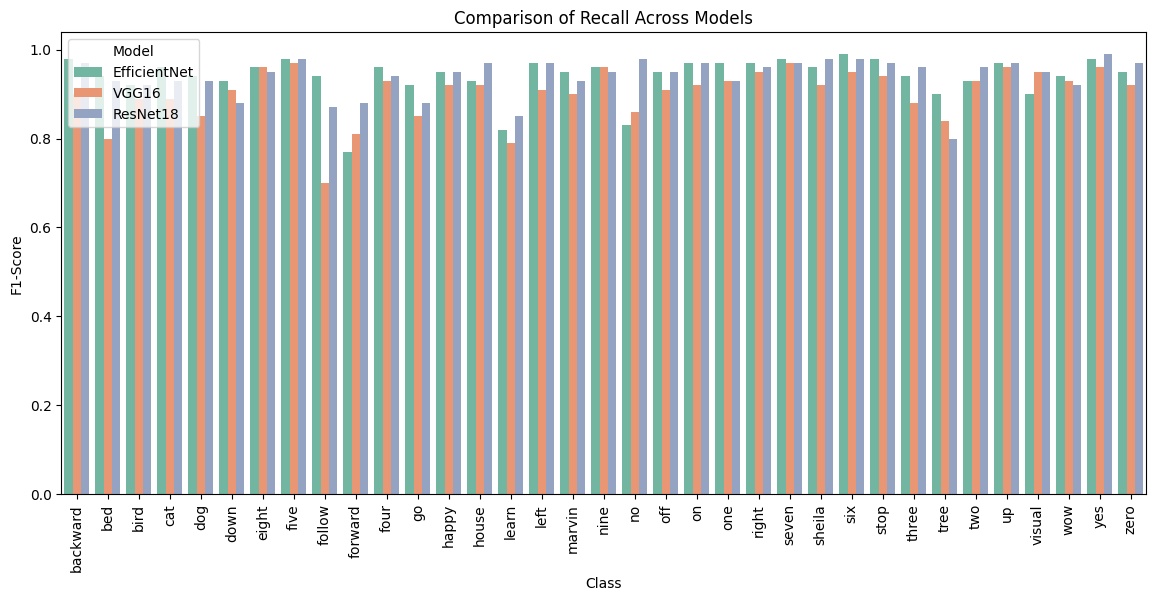

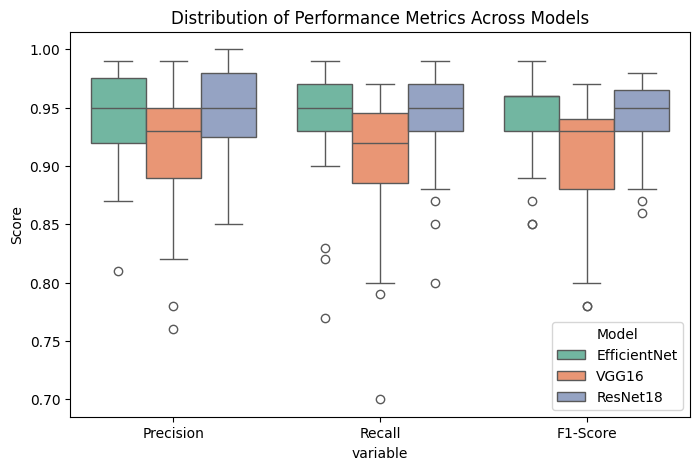

In [64]:
sns.set_palette("Set2")

# Bar plot comparing performance metrics per class across models
plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "F1-Score"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of F1-Score Across Models")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Precision"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of Precision Across Models")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Recall"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of Recall Across Models")
plt.legend(title="Model")
plt.show()


# Box plot to compare the overall distribution of Precision, Recall, and F1-score across models
plt.figure(figsize=(8, 5))
sns.boxplot(x="variable", y="value", hue="Model", data=df_melted)
plt.ylabel("Score")
plt.title("Distribution of Performance Metrics Across Models")
plt.show()

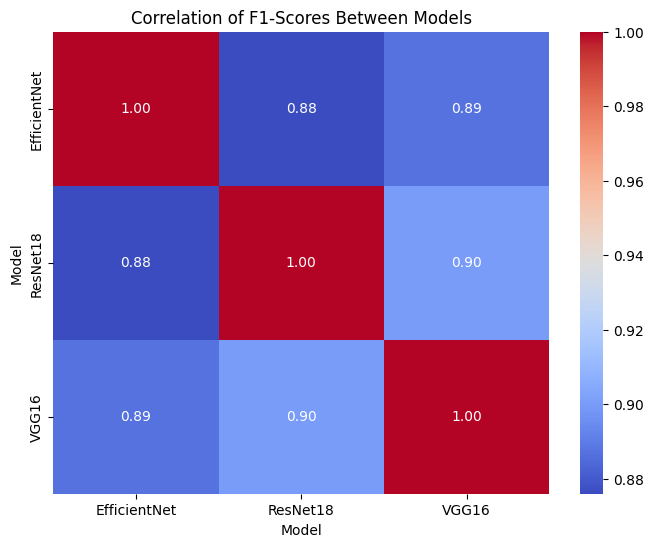

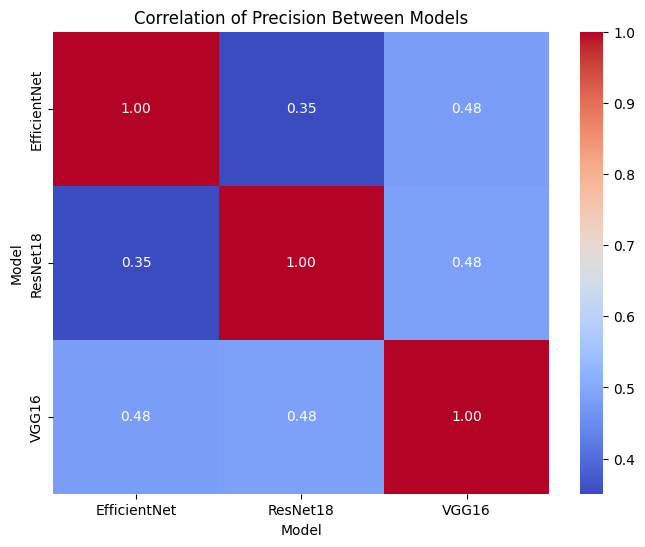

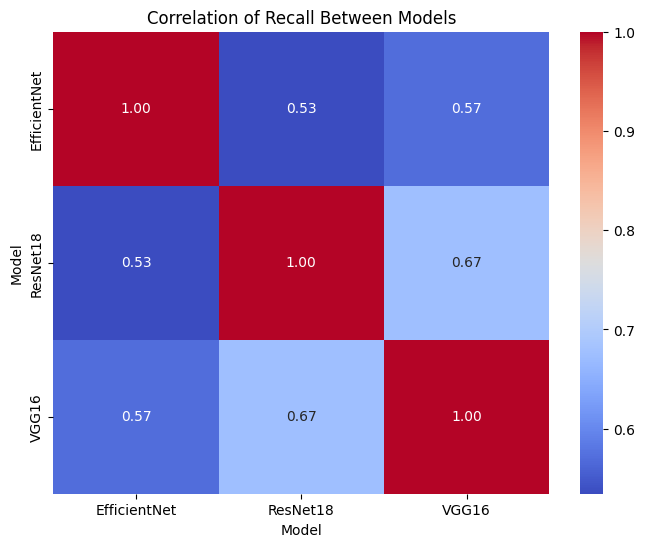

In [66]:
# Heatmap to show correlation between models
df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="F1-Score")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of F1-Scores Between Models")
plt.show()

df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="Precision")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Precision Between Models")
plt.show()

df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="Recall")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Recall Between Models")
plt.show()



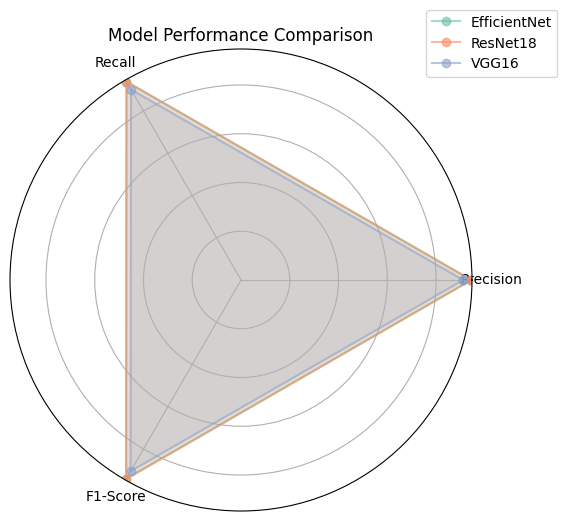

In [72]:
# Radar chart (Spider plot) for overall performance comparison

# Compute average scores per model
df_avg = df_all_models.groupby("Model")[["Precision", "Recall", "F1-Score"]].mean()

labels = df_avg.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model, row in df_avg.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model, marker="o", alpha=0.6)
    ax.fill(angles, values, alpha=0.2)

# Format radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Model Performance Comparison")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()